
# Project: Investigating Movies Revenues

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I chose to work with the movies database since I've been always a fan of movies from all genres. Because of the pandemic, I've became aware of the importance of being able to rest from reality in confinement, and what a better way to do so by watching movies. 

>I will specifically address some questions related to directors, movies and their revenues in order to provide a descriptive ranking.

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

Loading the dataframe

In [258]:
movies = pd.read_csv("tmdb-movies.csv")

Checking the first rows

In [259]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Exploring data types and missing values for each column

In [260]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Exploring distribution and statistics of variables

In [261]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

Since the variables "id","imdb_id", "popularity", "budget", "revenue", "cast", "homepage",  "tagline", "overview", "runtime", "production_companies", "release_date", "vote_count", "vote_average" are not relevant for this analysis, the whole columns will be discarded.

In [262]:
movies = movies.drop(["id","imdb_id", "popularity", "budget", "revenue", "cast", "homepage",  "tagline", "overview", "runtime", "production_companies", "release_date", "vote_count", "vote_average"], axis=1)


The variable "keywords" will be discarded since it has too many missing values and cannot be replaced due to its datatype (cannot perform any math application to fill this data).

In [263]:
movies = movies.drop(["keywords"], axis=1)

Checking the columns of the dataframe.

In [264]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
original_title    10866 non-null object
director          10822 non-null object
genres            10843 non-null object
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 509.4+ KB


In order to make it easier to understand, I will also change the "release_year" column name to "year".

In [265]:
movies.rename(columns={"release_year":"year"}, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which movie is the most profitable?
Here, I will try to clarify which movie has produced the largest revenue.

First, I use "describe" to get the highest value in the revenue_adj variable. I decided to use this column instead of "revenue" because revenue_adj includes the inflation, which contributes to make comparisons more accurate.

In [266]:
movies.describe().revenue_adj

count    1.086600e+04
mean     5.136436e+07
std      1.446325e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.369710e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

Then, I create a new DataFrame to retrieve top-10 movies with the highest revenue.

In [267]:
profitable = movies.filter(["original_title", "revenue_adj", "year"], axis = 1)
profitable = profitable.nlargest(10,"revenue_adj")
profitable

,original_title,revenue_adj,year
1386,Avatar,2.827124e+09,2009
1329,Star Wars,2.789712e+09,1977
5231,Titanic,2.506406e+09,1997
10594,The Exorcist,2.167325e+09,1973
9806,Jaws,1.907006e+09,1975
3,Star Wars: The Force Awakens,1.902723e+09,2015
8889,E.T. the Extra-Terrestrial,1.791694e+09,1982
8094,The Net,1.583050e+09,1995
10110,One Hundred and One Dalmatians,1.574815e+09,1961
4361,The Avengers,1.443191e+09,2012


Now I plot the results to have a better visualization of the top 10 movies.

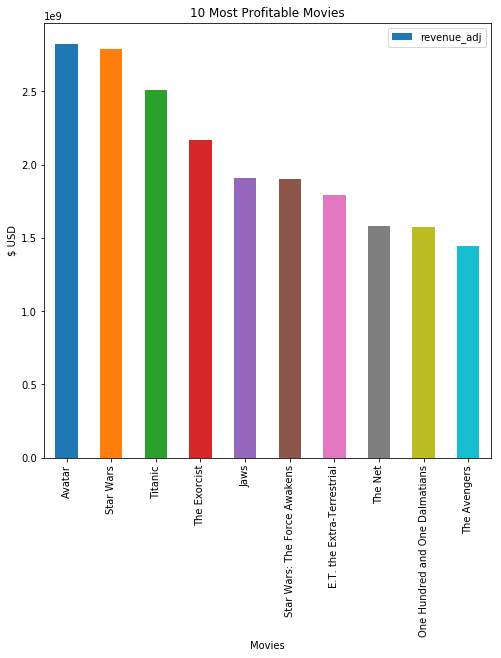

In [268]:
profitable.plot(x="original_title", y="revenue_adj", kind="bar", figsize = (8, 8))
plt.title('10 Most Profitable Movies')
plt.xlabel('Movies')
plt.ylabel('$ USD');

I create new variables to slice the data I need to highlight the conclusion.

In [269]:
top1_movie = profitable.iloc[0,0]
top1_revenue = profitable.iloc[0,1].round(2)


In [270]:
print ("Hence, the most profitable movie is {0} with a total revenue of USD ${1}.".format(top1_movie, top1_revenue))


Hence, the most profitable movie is Avatar with a total revenue of USD $2827123750.41.


### Research Question 2: Who is the most profitable director?

Fisrt, I create a new column to depict the revenue percent out of the total revenue of the database.

In [271]:
movies["revenue_percent"] = (movies["revenue_adj"] / movies["revenue_adj"].sum())*100
movies.head()

,original_title,director,genres,year,budget_adj,revenue_adj,revenue_percent
0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09,0.249486
1,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08,0.062381
2,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08,0.048666
3,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09,0.340913
4,Furious 7,James Wan,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09,0.248286


I filter the dataframe to group by director

In [272]:
movies_filter = movies.filter(["director", "revenue_adj", "revenue_percent"], axis=1)


In [273]:
director_group = movies_filter.groupby("director").sum().revenue_percent

I select the 10 directors with the highest percentage.

In [274]:
top_directors = director_group.nlargest(10,)
top_directors

director
Steven Spielberg    2.723842
James Cameron       1.312828
Peter Jackson       1.257755
George Lucas        1.131273
Robert Zemeckis     1.013330
Michael Bay         0.978396
Chris Columbus      0.912712
Tim Burton          0.811518
Ron Howard          0.811125
Ridley Scott        0.756025
Name: revenue_percent, dtype: float64

With this information, I create a new dataframe with rounded floats to plot the results.


In [275]:
directors = pd.DataFrame({"Director":["Steven Spielberg", "James Cameron", "Peter Jackson ", "George Lucas", "Robert Zemeckis", "Michael Bay", "Chris Columbus", "Tim Burton", "Ron Howard", "Ridley Scott"], 
                                  "Total Revenue Percent":[2.723842, 1.312828, 1.257755, 1.131273, 1.013330, 0.978396,  0.912712, 0.811518, 0.811125, 0.756025]})
directors["Total Revenue Percent"] = directors["Total Revenue Percent"].round(2)

directors
                                  

,Director,Total Revenue Percent
0,Steven Spielberg,2.72
1,James Cameron,1.31
2,Peter Jackson,1.26
3,George Lucas,1.13
4,Robert Zemeckis,1.01
5,Michael Bay,0.98
6,Chris Columbus,0.91
7,Tim Burton,0.81
8,Ron Howard,0.81
9,Ridley Scott,0.76


Now I plot the results.

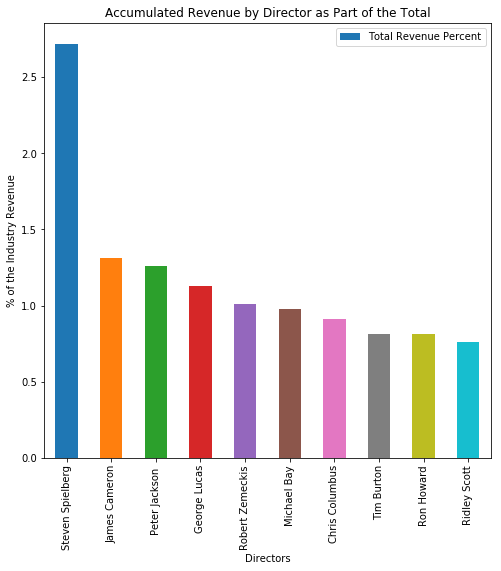

In [276]:
directors.plot(x="Director", y="Total Revenue Percent", kind="bar", figsize = (8,8))
plt.title('Accumulated Revenue by Director as Part of the Total')
plt.xlabel('Directors')
plt.ylabel('% of the Industry Revenue');

In [277]:
top1_director = directors.iloc[0,0]
top1_percent = directors.iloc[0,1].round(2)

In [278]:
print ("The most profitable director is {0} with a revenue percent of {1}%.".format(top1_director, top1_percent))

The most profitable director is Steven Spielberg with a revenue percent of 2.72%.


### Research Question 3: What are the top 5 years with the highest budget?
Here, I will try to explore the years that received the highest budgets in the industry.


In [279]:
release_group = movies.groupby("year").sum().budget_adj
years = release_group.nlargest(5).round(2)
years

year
2010    9.385001e+09
2011    8.742180e+09
2009    8.735031e+09
2013    8.645240e+09
2004    8.277766e+09
Name: budget_adj, dtype: float64

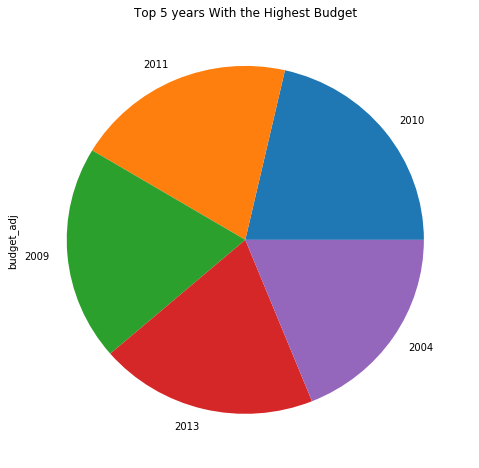

In [280]:
years.plot.pie(figsize = (8,8))
plt.title('Top 5 years With the Highest Budget');

The top 5 years with the highest budget are: 2010, 2011, 2009, 2013 and 2004.

Now I compare this information with the 10 most profitable movies from question 1

In [281]:
profitable

,original_title,revenue_adj,year
1386,Avatar,2.827124e+09,2009
1329,Star Wars,2.789712e+09,1977
5231,Titanic,2.506406e+09,1997
10594,The Exorcist,2.167325e+09,1973
9806,Jaws,1.907006e+09,1975
3,Star Wars: The Force Awakens,1.902723e+09,2015
8889,E.T. the Extra-Terrestrial,1.791694e+09,1982
8094,The Net,1.583050e+09,1995
10110,One Hundred and One Dalmatians,1.574815e+09,1961
4361,The Avengers,1.443191e+09,2012


As we can see, only the most profitable movie "Avatar" was made in one of the years with the highest budgets (2009).
Now I will display the top 10 most expensive (highest-budget) movies to check if they match with the 10 most profitable.


In [282]:
expensive = movies.filter(["original_title", "budget_adj", "year"], axis = 1)
expensive = expensive.nlargest(10,"budget_adj")
expensive

,original_title,budget_adj,year
2244,The Warrior's Way,4.250000e+08,2010
3375,Pirates of the Caribbean: On Stranger Tides,3.683713e+08,2011
7387,Pirates of the Caribbean: At World's End,3.155006e+08,2007
6570,Superman Returns,2.920507e+08,2006
5231,Titanic,2.716921e+08,1997
7394,Spider-Man 3,2.713305e+08,2007
1929,Tangled,2.600000e+08,2010
14,Avengers: Age of Ultron,2.575999e+08,2015
1389,Harry Potter and the Half-Blood Prince,2.541001e+08,2009
8089,Waterworld,2.504192e+08,1995


From the information provided it can be said that none of the 10 most expensive movies match with the 10 most profitable films from the dataset.

<a id='conclusions'></a>
## Conclusions

> As we were able to see from the analysis, the most profitable movie from the database was Avatar from 2009, directed by James Cameron. Nevertheless, when we sum the revenue made by each director, we can see that James Cameron is not the most profitable director. 

>In fact, the director that has the greatest revenue percentage out of the total is Steven Spielberg, who represents 2.72% of the total revenues form the database.

>We can also conclude that only one of the 10 most profitable movies was made in one of the years with the highest budget allocation (Avatar from 2009). Subsequently, when we compare the 10 most profitable movies with the 10 most expensive films, we find that none of the movies match. 


>At this point we have to be careful because this last comparison and unmatching does not imply correlation. I order to determine correlation, we would have to use statistical tools that are not considered in this descriptive analysis. Nevertheless, the samples amount from this dataset (10,866 movies) are sufficient to apply statistical analysis in further research.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [284]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0